In [1]:
import numpy as np

import tb_hamiltonian.continuum.new as TBHam

model = TBHam.BLGContinuumModel()

In [8]:
model.bond_length

1.42

In [9]:
L = 500
t1 = 2.7
tp = 0.4
V0 = 0
VSL = 0.005
alpha = 0.3

b1 = model.b1G / np.floor(2 * L / 3 / model.bond_length)
b2 = model.b2G / np.floor(2 * L / 3 / model.bond_length)

KG = (model.b1G - model.b2G) / 3

Qn = TBHam.Qn(b1)
# b1, b2 = Qn[0], Qn[1]
Q_vectors = TBHam.Q_concentric(b1, b2, model.b1G, model.b2G, max_val=3)


def H2D_KG(k):
    return model.H_folded(k + KG, t1, tp, V0, VSL, alpha, Q_vectors, Qn)


high_sym_points = {
    "Γ": np.array([0.0, 0.0]),
    "M": b1 / 2,
    "K": (b1 - b2) / 3,
}


path = "Γ K M Γ"
path_points = [high_sym_points[k] for k in path.split()]
kpath, k_point_indices = TBHam.interpolate_path(path_points, total_points=50)

In [10]:
eigenvalues, _ = TBHam.compute_eigenstuff(H2D_KG, kpath)

In [13]:
nbands = eigenvalues.shape[1]
mid_band = int(nbands / 2)
EF = (np.min(eigenvalues[:, mid_band]) + np.max(eigenvalues[:, mid_band - 1])) / 2

In [14]:
from tb_hamiltonian.utils import BandStructure

bs = BandStructure(
    high_sym_points=high_sym_points,
    path=path,
    distances=[*range(len(eigenvalues))],
    eigenvalues=eigenvalues,
    high_sym_indices=k_point_indices,
    e_fermi=EF,
)

<Axes: title={'center': 'Band Structure'}, ylabel='Energy (eV)'>

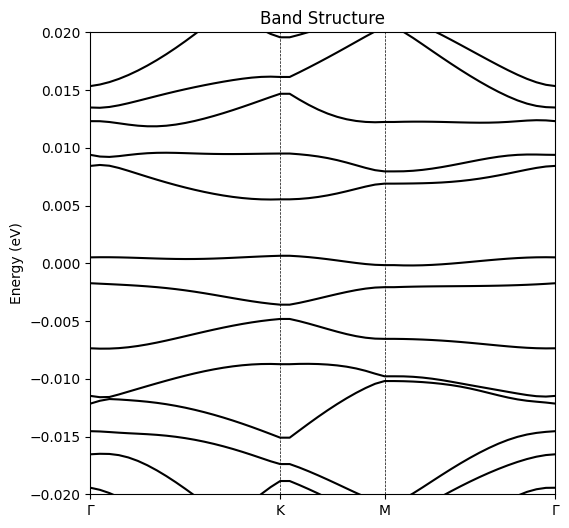

In [15]:
bs.plot(
    fig_params={
        "figsize": (6, 6),
        "ylim": (-0.02, 0.02),
    },
    plot_params={"color": "black"},
)